In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\91918\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='sex', ylabel='count'>

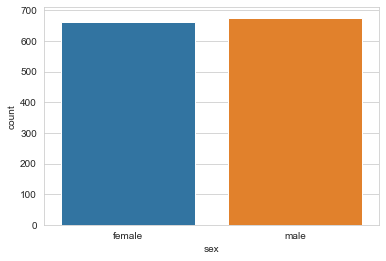

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=df)

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


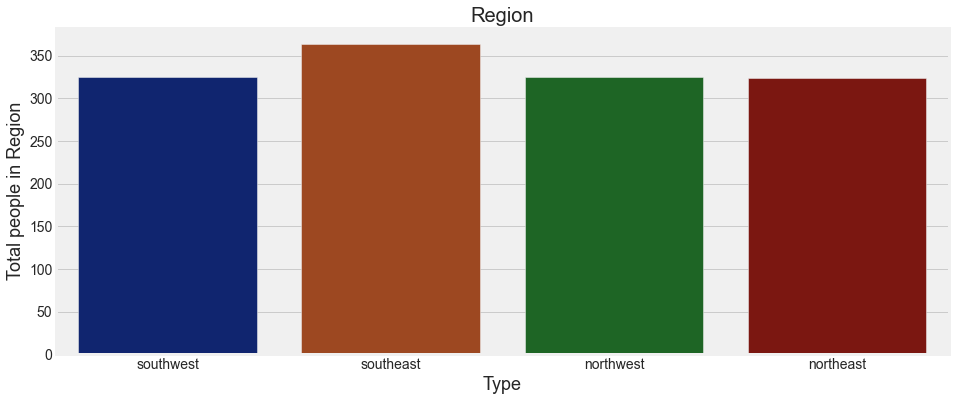

In [6]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
ax=sns.countplot('region',data=df,palette='dark',)
ax.set_xlabel(xlabel='Type',fontsize=18)
ax.set_ylabel(ylabel='Total people in Region',fontsize=18)
ax.set_title(label='Region',fontsize=20)
plt.show()

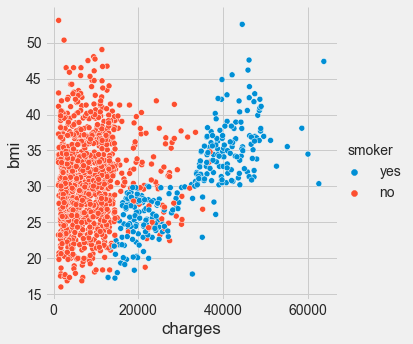

In [7]:
sns.relplot(x='charges',y='bmi',data=df,hue='smoker')

In [ ]:
sns.relplot(x='charges',y='bmi',hue='smoker',col='sex',data=df)

In [ ]:
g=sns.catplot(x='region',y='charges',data=df)
g.set_xticklabels(rotation=45)

In [8]:
Age_Group_0_10=0
Age_Group_11_20=0
Age_Group_21_30=0
Age_Group_31_40=0
Age_Group_41_50=0
Age_Group_51_60=0
Age_Group_61_70=0

for i in range(len(df)):
    if df.loc[i,'age']>0 and df.loc[i,'age']<=10:
        Age_Group_0_10 +=1
    elif df.loc[i,'age']>10 and df.loc[i,'age']<=20:
        Age_Group_11_20 +=1
    elif df.loc[i,'age']>20 and df.loc[i,'age']<=30:
        Age_Group_21_30 +=1
    elif df.loc[i,'age']>30 and df.loc[i,'age']<=40:
        Age_Group_31_40 +=1        
    elif df.loc[i,'age']>40 and df.loc[i,'age']<=50:
        Age_Group_41_50 +=1  
    elif df.loc[i,'age']>50 and df.loc[i,'age']<=60:
        Age_Group_51_60 +=1    
    else:
        Age_Group_61_70 +=1

In [9]:
Age_dict = {'Age_Group':['Age(0-10)','Age(11-20)','Age(21-30)','(Age31-40)',
            'Age(41-50)','Age(51-60)','Age(61-70)'],
            'Count':[Age_Group_0_10,Age_Group_11_20,Age_Group_21_30,
                    Age_Group_31_40,Age_Group_41_50,Age_Group_51_60,
                    Age_Group_61_70]
           }

In [10]:
df2 = pd.DataFrame(Age_dict)
df2

,Age_Group,Count
0,Age(0-10),0
1,Age(11-20),166
2,Age(21-30),278
3,(Age31-40),257
4,Age(41-50),281
5,Age(51-60),265
6,Age(61-70),91


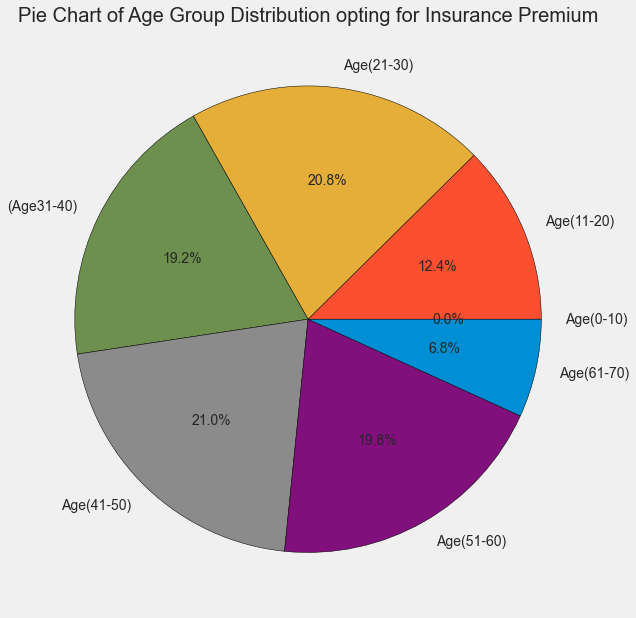

In [11]:
plt.figure(figsize=(10,10))
plt.title("Pie Chart of Age Group Distribution opting for Insurance Premium",fontsize=20)
plt.pie(df2['Count'],labels=df2['Age_Group'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()

In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['age', 'bmi', 'children', 'charges']

In [13]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['sex', 'smoker', 'region']

In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is sex and number of categories are 2
The feature is smoker and number of categories are 2
The feature is region and number of categories are 4


In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in categorical_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [17]:
from sklearn.preprocessing import OneHotEncoder
oe =OneHotEncoder(sparse=False,handle_unknown="error",drop="first")
oe

OneHotEncoder(drop='first', sparse=False)

In [18]:
ohe = OneHotEncoder()
a = ohe.fit_transform(df.region.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(a, columns = ["southwest","southeast","northwest","northeeast"])
df = pd.concat([df, OHE], axis=1)
df = df.drop("region",axis = 1)

In [19]:
a = ohe.fit_transform(df.smoker.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(a, columns = ["yes","no"])
df = pd.concat([df, OHE], axis=1)
df = df.drop("smoker",axis = 1)

In [20]:
a = ohe.fit_transform(df.sex.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(a, columns = ["female","male"])
df = pd.concat([df, OHE], axis=1)
df = df.drop("sex",axis = 1)

In [21]:
df

,age,bmi,children,charges,southwest,southeast,northwest,northeeast,yes,no,female,male
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [22]:
X = df.drop('charges', axis=1)
y = df['charges']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 15)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [28]:
y_pred

array([ 3.38449816e+04,  2.54546423e+04,  3.77498161e+03,  3.29498161e+03,
        2.75098161e+03,  7.86464230e+03,  1.12064230e+03,  3.48946423e+04,
        8.28698161e+03,  8.70298161e+03,  3.88064230e+03,  6.18298161e+03,
        3.58546423e+04,  3.27506423e+04,  5.43264230e+03,  3.72049816e+04,
        2.73809816e+04,  9.14464230e+03,  3.01009816e+04,  8.25664230e+03,
        5.52064230e+03,  9.63898161e+03,  3.32698161e+03,  1.82389816e+04,
        1.17366423e+04,  8.57498161e+03,  7.56064230e+03,  3.88689816e+04,
        3.74298161e+03, -1.70183913e+01,  6.73498161e+03,  9.06464230e+03,
        5.39098161e+03,  4.08209816e+04,  6.87264230e+03,  5.52864230e+03,
        5.36864230e+03,  3.88064230e+03,  6.26464230e+03,  1.13686423e+04,
        7.04864230e+03,  1.04789816e+04,  1.56069816e+04,  2.71898161e+03,
        1.08886423e+04,  1.10709816e+04,  1.13846423e+04,  6.36064230e+03,
        9.50298161e+03,  2.87249816e+04,  1.27264230e+03,  2.07264230e+03,
        8.86298161e+03,  

In [29]:
reg.score(X_train,y_train)*100

75.08151359500039

In [30]:
reg.score(X_test,y_test)*100

74.90130448632473

In [31]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 4165.992950618823
Mean Square Error (MSE): 34593619.18202081
Root Mean Square Error (RMSE): 5881.634057132492


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7490130448632473

In [33]:
from sklearn.linear_model import Lasso

In [47]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [48]:
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model= Lasso(alpha=a).fit(X_train,y_train)
    train_score = round(model.score(X_train,y_train)*100,2)
    score = round(model.score(X_test,y_test)*100,2)
    Y_pred = model.predict(X_test)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    Mse=metrics.mean_squared_error(y_test,y_pred)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

Alpha:0.0001
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.0010
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.0100
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.1000
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.3000
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.5000
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.7000
,train_score:75.080000,R2:74.920000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:0.9000
,train_score:75.080000,R2:74.930000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:1.0000
,train_score:75.080000,R2:74.930000,MAE:4174.756928,MSE:34562021.514382,RMSE:5878.947313
Alpha:10.0000
,train_score:75.080000,R2:74.930000,MAE:4174.756928,MSE:34562021.514

In [49]:
y_pred

array([33807.82055757, 25449.4159918 ,  3860.57710567,  3281.70624944,
        2739.7039794 ,  7948.24297894,  1122.66362272, 34967.76063554,
        8262.5653406 ,  8677.30309695,  3991.93793878,  6175.96630943,
       35828.48918233, 32745.07152289,  5520.1550982 , 37145.54384256,
       27328.16258259,  9126.80553107, 30138.3245806 ,  8278.00982203,
        5550.33190502,  9624.79819426,  3305.84605204, 18347.01877407,
       11732.07630996,  8661.35415737,  7529.76450164, 38780.54340544,
        3711.46182386,    44.90265317,  6789.27391612,  9142.87216657,
        5358.75842738, 40859.91641849,  6880.19923779,  5643.77246285,
        5359.79399482,  3888.56441466,  6367.9252098 , 11348.04235914,
        7126.18589172, 10441.90175331, 15621.32858312,  2709.76251329,
       10951.75464438, 11140.26666009, 11349.73934491,  6444.83809619,
        9580.33891805, 28656.19343558,  1270.58987797,  2040.2766285 ,
        8853.72574257, 10182.69891459, 12743.07527267, 26907.61887668,
      

In [50]:
lasso.score(X_train,y_train)*100

75.08449113651834

In [51]:
lasso.score(X_test,y_test)*100

74.92422953024247

In [52]:
r2_score(y_test,y_pred)

0.7492422953024247

In [53]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=0.0001)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

In [54]:
y_pred = ridgeR.predict(X_test)

In [55]:
#Training Score
ridgeR.score(X_train,y_train)*100

75.08449113651821

In [56]:
#Testing score
ridgeR.score(X_test,y_test)*100

74.92422951868541

In [57]:
r2_score(y_test,y_pred)

0.749242295186854

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[100,200,300,400,500],'learning_rate':[.0001,.001,0.01,0.2,0.3,0.5,0.7,0.10],'max_depth':[5,10,20,15],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=3)

In [61]:
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'random_state': 1,
 'subsample': 0.5}

In [62]:
reg=GradientBoostingRegressor(n_estimators=300,learning_rate=0.01,subsample=0.5,max_depth=5,random_state=1)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=300,
                          random_state=1, subsample=0.5)

In [64]:
y_pred1 = reg.predict(X_test)

In [65]:
reg.score(X_train,y_train)*100

91.35234791106525

In [66]:
reg.score(X_test,y_test)*100

85.06189920966808

In [67]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred1)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred1)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 2655.143324284398
Mean Square Error (MSE): 20589236.19204922
Root Mean Square Error (RMSE): 4537.536357104946


In [68]:
r2_score(y_test,y_pred1)

0.8506189920966809